<a href="https://colab.research.google.com/github/AlexandreFleutelot/https-github.com-AlexandreFleutelot-EWT_ESN/blob/main/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


wave= 0  MSE= tensor(8.5231e-10)
wave= 1  MSE= tensor(1.3923e-09)
wave= 2  MSE= tensor(3.7295e-09)
wave= 3  MSE= tensor(1.0499e-07)
wave= 4  MSE= tensor(1.3511e-06)
wave= 5  MSE= tensor(3.6842e-06)
wave= 6  MSE= tensor(8.5185e-06)


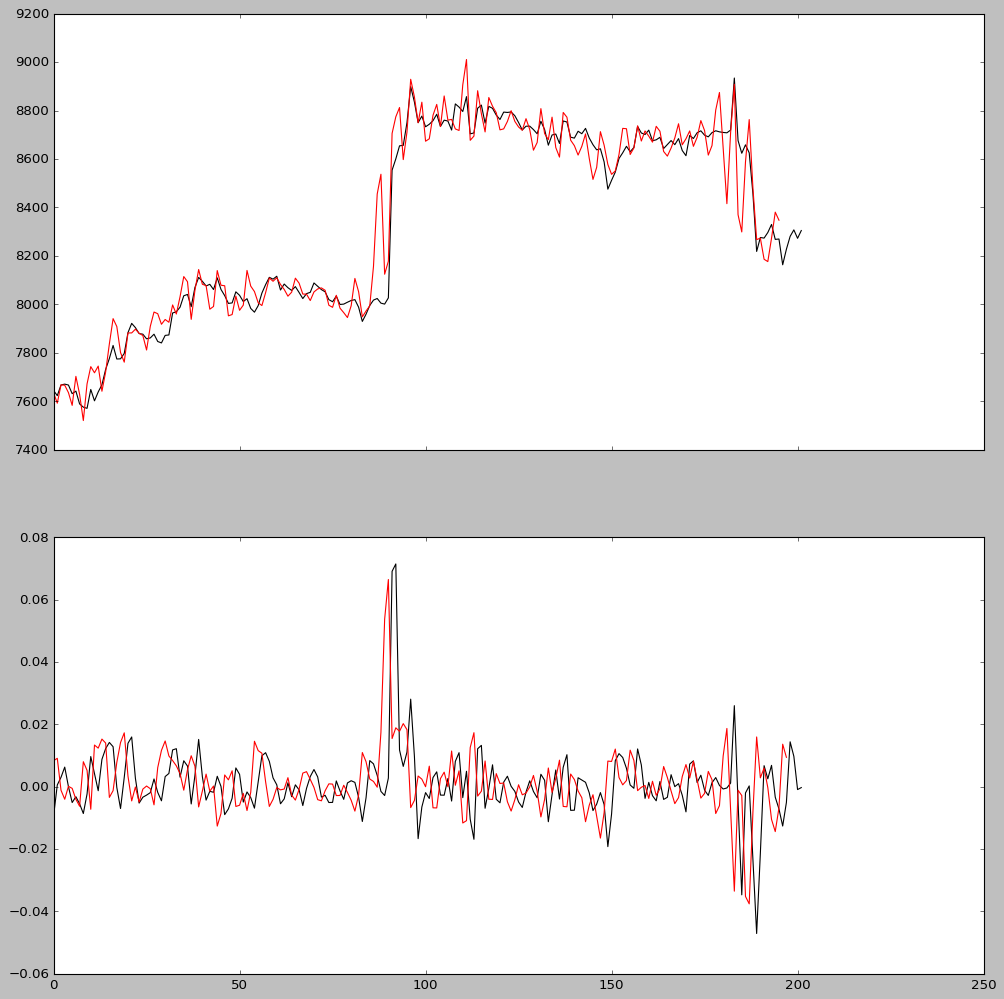

In [35]:
import random
from datetime import datetime, timedelta

import numpy as np
import pywt
import torch
from matplotlib import pyplot as plt

from utils import load_data, load_nn, get_roc



nn_cfg = [
          {'nb_layers': 3, 'nb_units': 400, 'ae_size_0': 297, 'density_0': 0.13819198670453153, 'norm_0': 0.9477225774352198, 'leaky_rate_0': 0.7582116205958579, 'rho_0': 0.9314449003774101, 'input_scale_0': 8.244029402710057, 'inter_scale_0': 0.09503519452851991, 'ae_size_1': 388, 'density_1': 0.15790057483261818, 'norm_1': 2.4270679000249347, 'leaky_rate_1': 0.879247226443736, 'rho_1': 0.7540803179926808, 'input_scale_1': 0.2376332355443822, 'inter_scale_1': 2.2609838540928657, 'ae_size_2': 373, 'density_2': 0.12171101540812299, 'norm_2': 8.643119461419083, 'leaky_rate_2': 0.9289209734018814, 'rho_2': 1.0320416637015777, 'input_scale_2': 0.21981409027808863, 'inter_scale_2': 5.491861275698114},
          {'nb_layers': 4, 'nb_units': 300, 'ae_size_0': 216, 'density_0': 0.11537556539895528, 'norm_0': 0.887565589591314, 'leaky_rate_0': 0.7871125453524792, 'rho_0': 0.5493091158507473, 'input_scale_0': 9.12835697748053, 'inter_scale_0': 0.2529420097282413, 'ae_size_1': 201, 'density_1': 0.1149382796256048, 'norm_1': 4.292591434326083, 'leaky_rate_1': 0.7338150159234351, 'rho_1': 0.5256306933635949, 'input_scale_1': 0.06138235217595738, 'inter_scale_1': 6.880656639589861, 'ae_size_2': 218, 'density_2': 0.07621637874385918, 'norm_2': 3.6197040759901604, 'leaky_rate_2': 0.9246636605734717, 'rho_2': 0.8081004703599579, 'input_scale_2': 2.3522832104892126, 'inter_scale_2': 1.7446406065852291, 'ae_size_3': 262, 'density_3': 0.19243347099332567, 'norm_3': 4.2373977395157, 'leaky_rate_3': 0.8381585430281386, 'rho_3': 1.2015874830706461, 'input_scale_3': 0.711099092556001, 'inter_scale_3': 4.616085281410635},
          {'nb_layers': 4, 'nb_units': 300, 'ae_size_0': 43, 'density_0': 0.08879329545700074, 'norm_0': 7.882786860922579, 'leaky_rate_0': 0.7936791027928431, 'rho_0': 0.931767497984364, 'input_scale_0': 2.724817081003208, 'inter_scale_0': 0.01271933662497483, 'ae_size_1': 76, 'density_1': 0.09277849107559497, 'norm_1': 1.4171896391674248, 'leaky_rate_1': 0.7582937927411583, 'rho_1': 0.9259463809154393, 'input_scale_1': 0.14550440347797872, 'inter_scale_1': 1.3327395263517534, 'ae_size_2': 211, 'density_2': 0.07546989594574378, 'norm_2': 1.5200084856330704, 'leaky_rate_2': 0.8323844599967819, 'rho_2': 0.7156060500969258, 'input_scale_2': 8.58986015633068, 'inter_scale_2': 0.33286689684503257, 'ae_size_3': 204, 'density_3': 0.06532151649770714, 'norm_3': 7.515485499459202, 'leaky_rate_3': 0.9934273172029613, 'rho_3': 0.6737509151301626, 'input_scale_3': 4.927985369549977, 'inter_scale_3': 3.600168300158969},
          {'nb_layers': 2, 'nb_units': 600, 'ae_size_0': 492, 'density_0': 0.12961073816945196, 'norm_0': 1.749117290493564, 'leaky_rate_0': 0.9956676491777731, 'rho_0': 1.4567701122450016, 'input_scale_0': 8.755607863994157, 'inter_scale_0': 1.9108195027731494, 'ae_size_1': 547, 'density_1': 0.06334854484017112, 'norm_1': 6.31902304837195, 'leaky_rate_1': 0.8634943097442203, 'rho_1': 0.7419331114322851, 'input_scale_1': 0.013549867143177236, 'inter_scale_1': 8.663399069308738},
          {'nb_layers': 7, 'nb_units': 171, 'ae_size_0': 170, 'density_0': 0.17302002893375867, 'norm_0': 7.351045200443977, 'leaky_rate_0': 0.8034407812265943, 'rho_0': 0.7821965593928939, 'input_scale_0': 0.10844338927881021, 'inter_scale_0': 5.80505316362763, 'ae_size_1': 171, 'density_1': 0.12509853108767627, 'norm_1': 4.994470062181556, 'leaky_rate_1': 0.9460569642884223, 'rho_1': 0.825489902111249, 'input_scale_1': 9.401901328886737, 'inter_scale_1': 0.021479701335143292, 'ae_size_2': 24, 'density_2': 0.07523197238698837, 'norm_2': 7.847931785906825, 'leaky_rate_2': 0.8353432455444736, 'rho_2': 1.1370313867696173, 'input_scale_2': 0.8513276331502382, 'inter_scale_2': 3.3403790202306065, 'ae_size_3': 159, 'density_3': 0.17113577974185737, 'norm_3': 0.794503626846637, 'leaky_rate_3': 0.9306889662586372, 'rho_3': 0.7477922712067646, 'input_scale_3': 0.07860754395211168, 'inter_scale_3': 0.05650678829569392, 'ae_size_4': 55, 'density_4': 0.17098086352100972, 'norm_4': 4.510743840616169, 'leaky_rate_4': 0.7995745933317475, 'rho_4': 0.6190158333427711, 'input_scale_4': 0.1902605311378007, 'inter_scale_4': 1.0404190388476144, 'ae_size_5': 136, 'density_5': 0.17137614083435465, 'norm_5': 3.390121353384996, 'leaky_rate_5': 0.9346480440951372, 'rho_5': 1.2098144102465782, 'input_scale_5': 1.225692571009092, 'inter_scale_5': 0.38551403632752945, 'ae_size_6': 32, 'density_6': 0.12131217673759946, 'norm_6': 6.25377281004828, 'leaky_rate_6': 0.9594825393097165, 'rho_6': 1.3475919823365903, 'input_scale_6': 0.4616044563207579, 'inter_scale_6': 0.6990706266301097},
          {'nb_layers': 2, 'nb_units': 600, 'ae_size_0': 468, 'density_0': 0.1820979929410803, 'norm_0': 4.321934529319265, 'leaky_rate_0': 0.9698401250580851, 'rho_0': 0.5243273004813004, 'input_scale_0': 6.762352496832119, 'inter_scale_0': 0.1545556862644571, 'ae_size_1': 456, 'density_1': 0.0732294906563469, 'norm_1': 1.1518781687024247, 'leaky_rate_1': 0.8174868180374482, 'rho_1': 1.349045316675867, 'input_scale_1': 0.07482973980405853, 'inter_scale_1': 0.45071405955845417},
          {'nb_layers': 2, 'nb_units': 600, 'ae_size_0': 468, 'density_0': 0.1820979929410803, 'norm_0': 4.321934529319265, 'leaky_rate_0': 0.9698401250580851, 'rho_0': 0.5243273004813004, 'input_scale_0': 6.762352496832119, 'inter_scale_0': 0.1545556862644571, 'ae_size_1': 456, 'density_1': 0.0732294906563469, 'norm_1': 1.1518781687024247, 'leaky_rate_1': 0.8174868180374482, 'rho_1': 1.349045316675867, 'input_scale_1': 0.07482973980405853, 'inter_scale_1': 0.45071405955845417}
        ]

#test params
total_units = 1200
forecast = 2
training_size = 1000
validation_size = 200
transient = 20

# wavelets
ewt_nb_waves = 6
ewt_wave_mode = 'periodic'
ewt_wave_type = 'dmey'

# ROC
roc_delay = 2
drop_first = 100

file_path = "./gemini_BTCUSD_1hr.csv"
d1 = datetime.strptime('2019-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
d2 = datetime.strptime('2021-03-01 00:00:00', '%Y-%m-%d %H:%M:%S')

end_date = d1 + (d2 - d1) * random.random()
start_date = end_date - timedelta(hours=5000)
start_date = start_date.strftime('%Y-%m-%d %H:%M:%S')
end_date = end_date.strftime('%Y-%m-%d %H:%M:%S')

data = load_data(file_path, start_date, end_date)

#generate nn(s)
nn = {}
for i in range(ewt_nb_waves+1):
    nn[i] = load_nn(nn_cfg[i])

#get signal
sig = get_roc(data, roc_delay, drop_first=drop_first)

#get all waves
w = pywt.Wavelet(ewt_wave_type)
coeffs = pywt.wavedec(sig[:training_size+validation_size], w, level=ewt_nb_waves, mode=ewt_wave_mode)

waves = {}
train_outputs = {}
valid_outputs = {}
train_targets = {}
valid_targets = {}

for train_waves in range(ewt_nb_waves+1):

    n_coeffs = coeffs.copy()
    for i in range(len(n_coeffs)):
        if i != train_waves:
            n_coeffs[i] = np.zeros_like(coeffs[i])
    waves = pywt.waverec(n_coeffs, w)

    X = {}
    for layer in range(nn[train_waves].n_layer):
        X[layer] = torch.tensor(waves[:-forecast]).view(1, -1).type(torch.float)
    Y = torch.tensor(waves[forecast:]).view(1, -1).type(torch.float)

    states = nn[train_waves].forward(X, train_ae=True)

    train_states = {}
    valid_states = {}
    for layer in range(nn[train_waves].n_layer):
        train_states[layer] = states[layer][:, transient: training_size]
        valid_states[layer] = states[layer][:,  training_size:validation_size + training_size]
    train_targets[train_waves] = Y[:, transient: training_size]
    valid_targets[train_waves] = Y[:, training_size:validation_size + training_size]

    #nn[train_waves].train_readout_EO(train_states, train_targets[train_waves], max_iter=10000, verbose=True)
    nn[train_waves].train_readout(train_states, train_targets[train_waves], lb=0.01)
    train_outputs[train_waves] = nn[train_waves].compute_readout(train_states)
    valid_outputs[train_waves] = nn[train_waves].compute_readout(valid_states)

    print("wave=", train_waves, " MSE=", torch.mean((valid_outputs[train_waves] - valid_targets[train_waves]) ** 2))

real_output = valid_outputs[0].numpy()[0, :]
real_target = valid_targets[0].numpy()[0, :]
for train_waves in range(1, ewt_nb_waves + 1):
    real_output += valid_outputs[train_waves].numpy()[0, :]
    real_target += valid_targets[train_waves].numpy()[0, :]

close = data['Close'].values[drop_first+training_size:]
rebuild = []
rebuild2 = []
for i in range(roc_delay, len(real_output)):
    rebuild += [(1 + real_output[i]) * close[i - roc_delay]]
    rebuild2 += [(1 + real_target[i]) * close[i - roc_delay]]


plt.style.use('classic')

fig, axs = plt.subplots(2, sharex=True, sharey=False, figsize=(15,15))

axs[0].plot(close[: validation_size+forecast], c='k')
axs[0].plot(rebuild, c='r')
#plt.plot(rebuild2, c='g')
axs[1].plot(sig[training_size:training_size+validation_size+forecast], c='k')
axs[1].plot(real_output, c='r')
plt.show()


